In [2]:
import tclab
from tclab import Plotter, clock, Historian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ωg = 5e-3
ω = 5*np.logspace(-4, -2, 6)

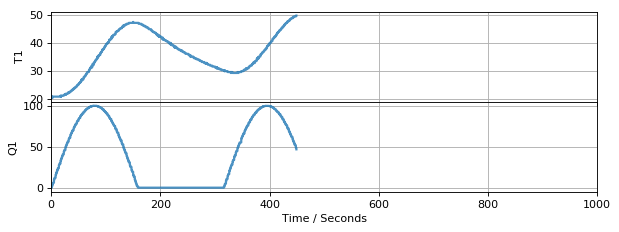

In [ ]:
TCLab = tclab.setup(connected=False, speedup=10)

for w in ω:
    with TCLab() as lab:
        sources = [('T1', lambda: lab.T1), ('Q1', lambda: lab.U1)]
        h = tclab.Historian(sources)
        p = Plotter(h, 1000)
    
        for t in clock(1000): 
            A = 100
            Qbar = 0
            Q1 = lab.Q1(Qbar + A*np.sin(w*t))
            h.update(t) 
            p.update(t)     
        h.get_sessions()
        h.load_session(1)
        df = pd.DataFrame({h.columns[0]:h.fields[0], h.columns[1]:h.fields[1], h.columns[2]:h.fields[2]})
        df.to_csv('run3_'+str(w),index=False)

In [5]:
run3_1 = pd.read_csv('run3_0.0005',index_col=False)
run3_2 = pd.read_csv('run3_0.0012559432157547897',index_col=False)
run3_3 = pd.read_csv('run3_0.003154786722400965',index_col=False)
run3_4 = pd.read_csv('run3_0.00792446596230557',index_col=False)
run3_5 = pd.read_csv('run3_0.019905358527674867',index_col=False)
run3_6 = pd.read_csv('run3_0.05',index_col=False)

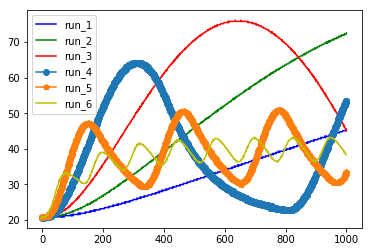

In [8]:
plt.plot(run3_1.Time,run3_1.T1,'-b',label='run_1')
plt.plot(run3_2.Time,run3_2.T1,'-g',label='run_2')
plt.plot(run3_3.Time,run3_3.T1,'-r',label='run_3')
plt.plot(run3_4.Time,run3_4.T1,'-o',label='run_4')
plt.plot(run3_5.Time,run3_5.T1,'-p',label='run_5')
plt.plot(run3_6.Time,run3_6.T1,'-y',label='run_6')
plt.legend()